In [2]:
import torch
import torch.nn as nn  # component for building neural networks
import torch.optim as optim  # component for training neural networks
import torch.nn.functional as F  # component for activation functions
import helper_utils

In [3]:
distances = helper_utils.new_distances
times = helper_utils.new_times

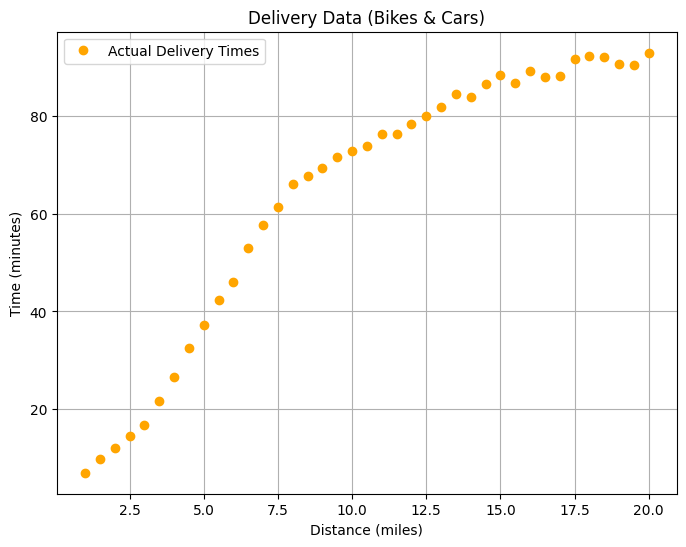

In [4]:
helper_utils.plot_data(distances, times)

In [6]:
# Calculate the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

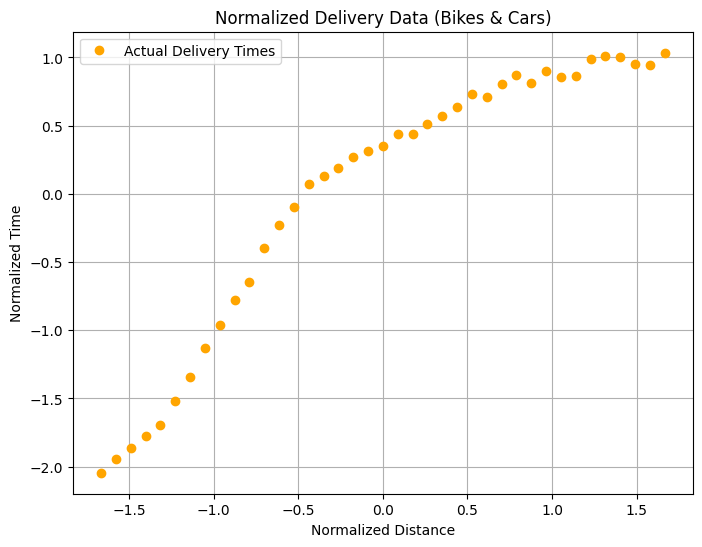

In [8]:
helper_utils.plot_data(distances_norm, times_norm, normalize=True)

In [37]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(27)
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

In [38]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

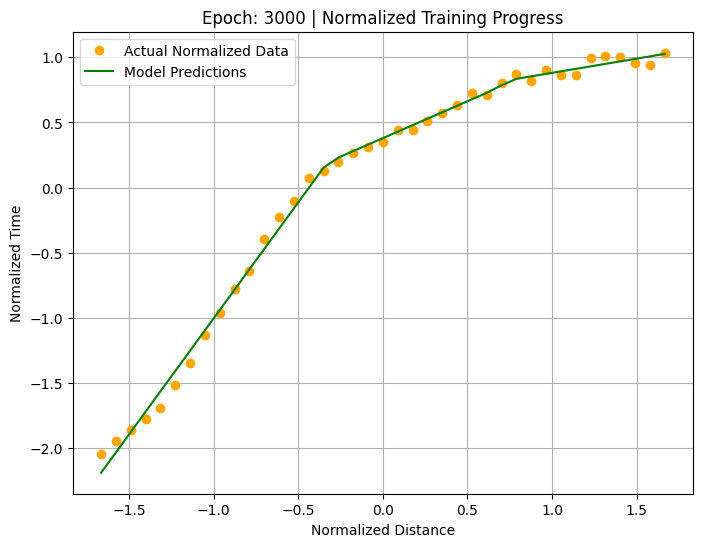


Training Complete.

Final Loss: 0.0031437124125659466


In [39]:
for epoch in range(3000):
    optimizer.zero_grad()
    outputs = model(distances_norm)
    loss = loss_function(outputs, times_norm)
    loss.backward()
    optimizer.step()
    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )
print("\nTraining Complete.")
print(f"\nFinal Loss: {loss.item()}")

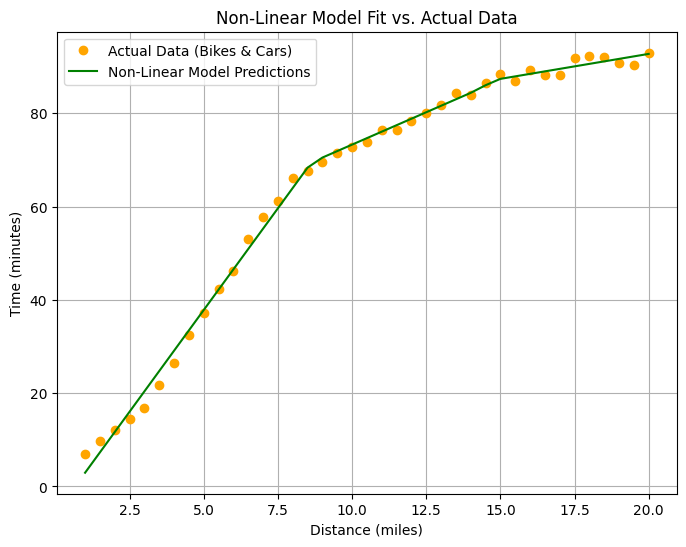

In [40]:
helper_utils.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

In [41]:
distance_to_predict = 5.1

In [42]:
with torch.no_grad():
    # Normalize the new distance
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std
    # Get the normalized prediction from the model
    predicted_time_norm = model(new_distance_norm)
    
    # De-normalize the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean
    # --- Decision Making Logic ---
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")
    
    # First, check if the delivery is possible within the 45-minute timeframe
    if predicted_time_actual.item() > 45:
        print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
    else:
        # If it is possible, then determine the vehicle based on the distance
        if distance_to_predict <= 3:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
        else:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")
    

Prediction for a 5.1-mile delivery: 38.7 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.
